# Zee movies case study -Scaler assignment submitted 10th aug 2025

This case study is for building a recommender system based on zee movies data
I have explored techniques such as KNN and SVD with cosine similarity as well as with Pearson correlation
I found that using cosine similarity in item item works better because it captured multiple genres associated with the same movie while cosine similarity could not.
I also found that using fewer in matrix factorization actually reduced the rmse and mape values, which is strange.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [412]:
data_movies=pd.read_fwf('/Users/sridhar/Downloads/ZEE-data scaler/zee-movies.dat', encoding='ISO-8859-1')

In [413]:
data_movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [414]:
data_movies=pd.DataFrame(data_movies.iloc[:,0])

In [415]:
data_movies.columns

Index(['Movie ID::Title::Genres'], dtype='object')

In [416]:
data_movies

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


In [417]:
new_movies=data_movies['Movie ID::Title::Genres'].str.split("::", expand=True).drop(0, axis=1)

In [418]:
new_movies.columns=['Movie ID','Title-Genres']

In [419]:
new_movies

,Movie ID,Title-Genres
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
...,...,...
3878,Meet the Parents (2000),Comedy
3879,Requiem for a Dream (2000),Drama
3880,Tigerland (2000),Drama
3881,Two Family House (2000),Drama


In [420]:
new_genres=new_movies['Title-Genres'].str.split("|", expand=True)

In [421]:
new_genres

,0,1,2,3,4
0,Animation,Children's,Comedy,None,None
1,Adventure,Children's,Fantasy,None,None
2,Comedy,Romance,None,None,None
3,Comedy,Drama,None,None,None
4,Comedy,None,None,None,None
...,...,...,...,...,...
3878,Comedy,None,None,None,None
3879,Drama,None,None,None,None
3880,Drama,None,None,None,None
3881,Drama,None,None,None,None


In [422]:
new_movies=pd.merge(new_movies, new_genres, how='inner', left_index=True, right_index=True).drop('Title-Genres', axis=1) #Merge using the common indices

In [423]:
new_movies

,Movie ID,0,1,2,3,4
0,Toy Story (1995),Animation,Children's,Comedy,None,None
1,Jumanji (1995),Adventure,Children's,Fantasy,None,None
2,Grumpier Old Men (1995),Comedy,Romance,None,None,None
3,Waiting to Exhale (1995),Comedy,Drama,None,None,None
4,Father of the Bride Part II (1995),Comedy,None,None,None,None
...,...,...,...,...,...,...
3878,Meet the Parents (2000),Comedy,None,None,None,None
3879,Requiem for a Dream (2000),Drama,None,None,None,None
3880,Tigerland (2000),Drama,None,None,None,None
3881,Two Family House (2000),Drama,None,None,None,None


In [424]:
new_movies.columns=['Movie ID','Genre 1','Genre 2','Genre 3','Genre 4','Genre 5']

In [425]:
new_movies

,Movie ID,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5
0,Toy Story (1995),Animation,Children's,Comedy,None,None
1,Jumanji (1995),Adventure,Children's,Fantasy,None,None
2,Grumpier Old Men (1995),Comedy,Romance,None,None,None
3,Waiting to Exhale (1995),Comedy,Drama,None,None,None
4,Father of the Bride Part II (1995),Comedy,None,None,None,None
...,...,...,...,...,...,...
3878,Meet the Parents (2000),Comedy,None,None,None,None
3879,Requiem for a Dream (2000),Drama,None,None,None,None
3880,Tigerland (2000),Drama,None,None,None,None
3881,Two Family House (2000),Drama,None,None,None,None


In [426]:
new_df_movies=new_movies.melt(id_vars='Movie ID',value_vars=['Genre 1','Genre 2','Genre 3', 'Genre 4','Genre 5'])

In [427]:
new_df_movies.drop('variable', axis=1, inplace=True)

In [428]:
new_df_movies

,Movie ID,value
0,Toy Story (1995),Animation
1,Jumanji (1995),Adventure
2,Grumpier Old Men (1995),Comedy
3,Waiting to Exhale (1995),Comedy
4,Father of the Bride Part II (1995),Comedy
...,...,...
19410,Meet the Parents (2000),None
19411,Requiem for a Dream (2000),None
19412,Tigerland (2000),None
19413,Two Family House (2000),None


In [429]:
new_df_movies.drop_duplicates(keep='first', inplace=True)

In [430]:
new_df_movies.columns=['Movie ID','Genre']

In [431]:
new_df_movies['Genre'].fillna('Blank', inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/2205205170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_movies['Genre'].fillna('Blank', inplace=True)


In [432]:
new_df_movies['Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Blank', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'Documenta', 'War',
       'D', 'Fantasy', 'Animati', 'Musical', 'Dr', '', 'Docu', 'Document',
       'Documen', 'Horro', 'Acti', 'Comed', 'Come', 'A', 'Horr', 'Chil',
       'Wester', 'Childre', 'Childr', 'Rom', 'Children', "Children'",
       'Adv', 'Adventu', 'Roman', 'Chi', 'Sci', 'Sci-', 'Adventur',
       'Advent', 'Roma', 'S', 'Dram', 'Com', 'Wa', 'Th', 'Fantas',
       'Music', 'We', 'F', 'Thri', 'Thrille', 'Sci-F', 'Fant', 'Ro', 'R'],
      dtype=object)

In [433]:
replacements=[(r"^Doc.*","Documentary"),(r"^Act.*","Action"),
              (r"^Com.*","Comedy"),(r"^Adv.*","Adventure"),
              (r"^Chil.*", "Children\'s"),(r"^Fan.*","Fantasy"),
              (r"^Hor.*","Horror"),(r"^Th.*","Thriller"),(r"^R.*","Romance"),(r"^Sc.*","Sci-Fi"),(r"^Ani.*","Animation"),(r"^We.*","Western"),(r"^Dr.*","Drama"),(r"^Mus.*","Musical"),(r"^Wa.*", "War")]

In [434]:
for pattern, repl in replacements:
    new_df_movies['Genre']=new_df_movies['Genre'].apply(lambda x: re.sub(pattern, repl, x))

In [435]:
#new_df_movies['Genre']=new_df_movies['Genre'].str.replace(r"^Doc.*","Documentary",regex=True)

In [436]:
new_df_movies['Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Blank', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'D', 'Fantasy',
       'Musical', '', 'A', 'Chi', 'S', 'F'], dtype=object)

In [437]:
new_df_movies['Genre'].value_counts()

Genre
Blank          3873
Drama          1582
Comedy         1189
Action          501
Thriller        488
Romance         462
Horror          340
Adventure       282
Sci-Fi          263
Children's      248
Crime           210
War             139
Documentary     124
Musical         113
Mystery         105
Animation       104
Western          68
Fantasy          62
Film-Noir        44
                  8
D                 3
A                 2
S                 2
Chi               1
F                 1
Name: count, dtype: int64

In [438]:
new_df_movies.drop(new_df_movies[new_df_movies['Genre']=='Blank'].index, inplace=True)

In [439]:
new_df_movies.drop_duplicates(keep='first', inplace=True)

In [440]:
new_df_movies.drop(new_df_movies[new_df_movies['Genre'].isin(['','D','A','S','Chi','F'])].index, inplace=True)

In [441]:
new_df_movies['Genre'].value_counts() #We see that drama, comedy, action are the genres that appear in the list

Genre
Drama          1582
Comedy         1189
Action          501
Thriller        488
Romance         462
Horror          340
Adventure       282
Sci-Fi          263
Children's      248
Crime           210
War             139
Documentary     124
Musical         113
Mystery         105
Animation       104
Western          68
Fantasy          62
Film-Noir        44
Name: count, dtype: int64

In [442]:
new_df_movies

,Movie ID,Genre
0,Toy Story (1995),Animation
1,Jumanji (1995),Adventure
2,Grumpier Old Men (1995),Comedy
3,Waiting to Exhale (1995),Comedy
4,Father of the Bride Part II (1995),Comedy
...,...,...
16776,Diva (1981),Thriller
17058,Hercules (1997),Musical
17543,Lady and the Tramp (1955),Romance
17544,"Little Mermaid, The (1989)",Romance


In [443]:
new_df_movies['Release year']=new_df_movies['Movie ID'].apply(lambda x: re.findall(r'\(\d\d\d\d\)',x)).apply(lambda x:x[0])

In [444]:
new_df_movies

,Movie ID,Genre,Release year
0,Toy Story (1995),Animation,(1995)
1,Jumanji (1995),Adventure,(1995)
2,Grumpier Old Men (1995),Comedy,(1995)
3,Waiting to Exhale (1995),Comedy,(1995)
4,Father of the Bride Part II (1995),Comedy,(1995)
...,...,...,...
16776,Diva (1981),Thriller,(1981)
17058,Hercules (1997),Musical,(1997)
17543,Lady and the Tramp (1955),Romance,(1955)
17544,"Little Mermaid, The (1989)",Romance,(1989)


In [445]:
#new_df_movies[new_df_movies['Release year']=='8230'] #there is some error here, maybe we need to impute it or drop it-I will check this again

In [446]:
new_df_movies['Release year']=new_df_movies['Release year'].apply(lambda x:x[1:5]).astype(int) #Take only the 2nd to 5th characters, this will remove the brackets at the beginning and end

In [447]:
new_df_movies['Release year'].unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1977, 1965, 1982,
       1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970, 1960,
       1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1950, 1946,
       1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952, 1951, 1957,
       1961, 1954, 1934, 1944, 1963, 1942, 1941, 1964, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [448]:
new_df_movies[new_df_movies['Release year']>2025]

,Movie ID,Genre,Release year


In [449]:
new_df_movies.dtypes

Movie ID        object
Genre           object
Release year     int64
dtype: object

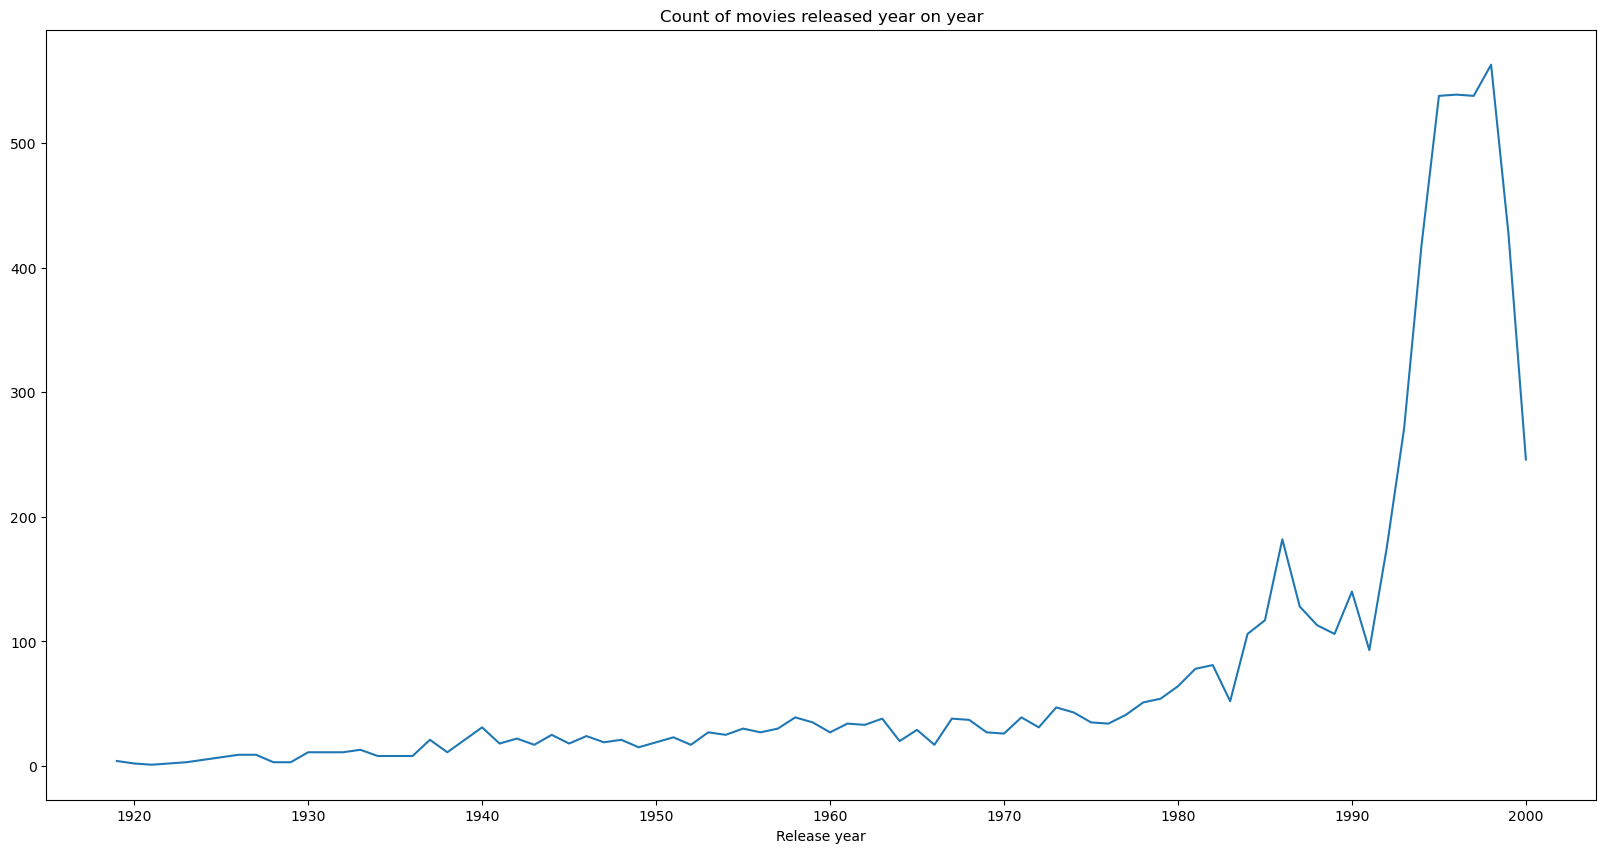

In [450]:
plt.figure(figsize=(20,10))
new_df_movies[new_df_movies['Release year']!=8230].groupby('Release year')['Release year'].count().plot()
plt.title("Count of movies released year on year")
plt.show()

#We see that the number of movies has released in the 1990s has gone up sharply compared to earlier

In [451]:
new_df_movies['Release year']=new_df_movies['Release year'].astype('int')

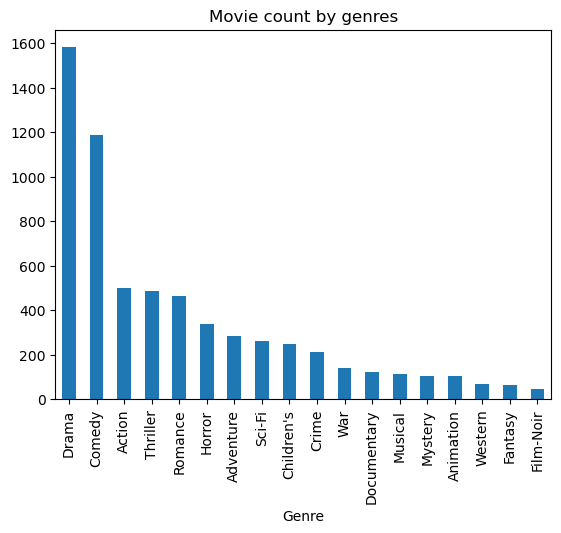

In [452]:
new_df_movies['Genre'].value_counts().plot(kind='bar')
plt.title('Movie count by genres')
plt.show()
#We see that the maximum number of entries is for drama, comedy, and action
#This is overall-I want to now find it by pre 1990 and post 1990 since the values have increased drastically around this time

In [453]:
new_df_movies.dtypes

Movie ID        object
Genre           object
Release year     int64
dtype: object

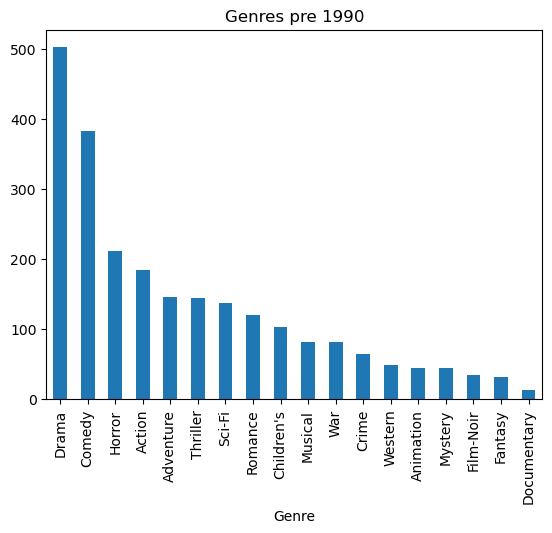

In [454]:
new_df_movies[new_df_movies['Release year']<1990]['Genre'].value_counts().plot(kind='bar')
plt.title('Genres pre 1990')
plt.show()

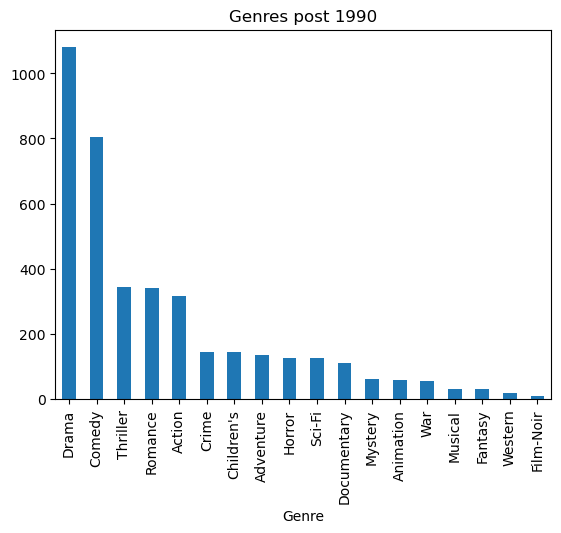

In [455]:
new_df_movies[new_df_movies['Release year']>=1990]['Genre'].value_counts().plot(kind='bar')
plt.title('Genres post 1990')
plt.show()

In [456]:
#We see that post 1990, fewer horror films were released, and more romantic films were released.
#It may indicate how tastes have changed

In [457]:
data_users=pd.read_fwf('/Users/sridhar/Downloads/ZEE-data scaler/zee-users.dat')

In [458]:
data_users

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
...,...
6035,6036::F::25::15::32603
6036,6037::F::45::1::76006
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060


In [459]:
data_users=data_users['UserID::Gender::Age::Occupation::Zip-code'].str.split("::", expand=True)

In [460]:
data_users.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [461]:
#data_users.drop('UserID', axis=1,inplace=True)

In [462]:
data_users.drop_duplicates(keep='first', inplace=True)

In [463]:
data_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [464]:
data_users.dtypes

UserID        object
Gender        object
Age           object
Occupation    object
Zip-code      object
dtype: object

In [465]:
data_users['Age']=data_users['Age'].astype('int')

<Axes: >

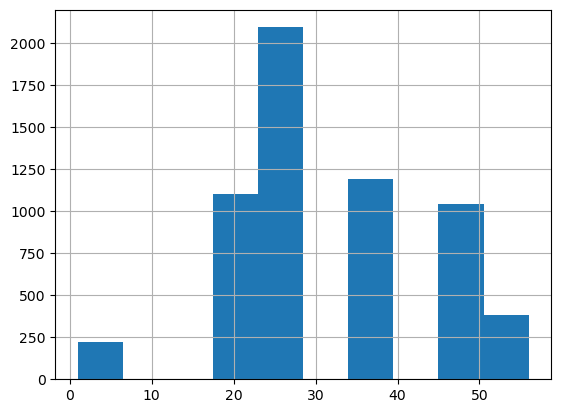

In [466]:
data_users.Age.hist()

In [467]:
data_users['Gender'].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

In [468]:
data_users['Gender'].replace({'M':0,'F':1}, inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/869349682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_users['Gender'].replace({'M':0,'F':1}, inplace=True)
/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/869349682.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [469]:
data_users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [470]:
data_ratings=pd.read_fwf('/Users/sridhar/Downloads/ZEE-data scaler/zee-ratings.dat')

In [471]:
data_ratings

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [472]:
data_ratings=data_ratings['UserID::MovieID::Rating::Timestamp'].str.split("::", expand=True)

In [473]:
data_ratings.columns=['UserID','MovieID','Rating','Timestamp']

In [474]:
data_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [475]:
data_ratings.drop_duplicates(keep='first', inplace=True)

In [476]:
data_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [477]:
data_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [478]:
data_ratings.dtypes

UserID       object
MovieID      object
Rating       object
Timestamp    object
dtype: object

In [479]:
data_ratings['Rating']=data_ratings['Rating'].astype('int')

In [480]:
data_ratings['Rating'].unique()

array([5, 3, 4, 2, 1])

In [481]:
movie_avg_ratings=data_ratings.groupby('MovieID')['Rating'].mean()

In [482]:
most_popular_movies=movie_avg_ratings[movie_avg_ratings==5].index


In [483]:
new_df_movies.iloc[most_popular_movies] #These are the movies where the average rating is 5

,Movie ID,Genre,Release year
1843,Out of Sight (1998),Action,1998
3196,Hard-Boiled (Lashou shentan) (1992),Action,1992
3257,What Planet Are You From? (2000),Comedy,2000
3304,Buck and the Preacher (1972),Western,1972
3407,Jacob's Ladder (1990),Horror,1990
3636,Bird on a Wire (1990),Action,1990
3685,"Adventures of Rocky and Bullwinkle, The (2000)",Animation,2000
3928,How to Make an American Quilt (1995),Romance,1995
796,American Buffalo (1996),Drama,1996
998,Herbie Rides Again (1974),Adventure,1974


In [484]:
movies_rating_counts=data_ratings.groupby('MovieID')['Rating'].count()

In [485]:
df_movies_2=pd.DataFrame([movies_rating_counts, movie_avg_ratings]).T

In [486]:
df_movies_2

,Rating,Rating
MovieID,,
1,2077.0,4.146846
10,888.0,3.540541
100,128.0,3.062500
1000,20.0,3.050000
1002,8.0,4.250000
...,...,...
994,450.0,4.095556
996,256.0,2.906250
997,28.0,3.357143


In [487]:
df_movies_2.columns=['Count of rating','avg rating']

In [488]:
df_movies_2['Popularity score']=df_movies_2['Count of rating']*df_movies_2['avg rating']

In [489]:
most_popular_movies_2=df_movies_2.sort_values('Popularity score', ascending=False)[:10].index

In [490]:
new_df_movies.iloc[most_popular_movies_2] #these movies have highest ratings and watched by maximum people

,Movie ID,Genre,Release year
2879,From Russia with Love (1963),Action,1963
262,Like Water for Chocolate (Como agua para choco...,Drama,1992
1207,Amadeus (1984),Drama,1984
1221,Braindead (1992),Comedy,1992
2042,"Man with Two Brains, The (1983)",Comedy,1983
1209,Once Upon a Time in America (1984),Crime,1984
597,"Wooden Man's Bride, The (Wu Kui) (1994)",Drama,1994
2589,"Flying Saucer, The (1950)",Sci-Fi,1950
2783,"Soldier's Story, A (1984)",Drama,1984
593,Pretty Woman (1990),Comedy,1990


In [491]:
data_users[data_users['Gender']=='M']

,UserID,Gender,Age,Occupation,Zip-code


In [492]:
male_users=data_users[data_users['Gender']=='M']

In [493]:
fem_users=data_users[data_users['Gender']=='F']

In [494]:
fem_users_list=list(map(str,list(data_users[data_users['Gender']=='F'].index)))

In [495]:
male_users_list=list(map(str,list(data_users[data_users['Gender']=='M'].index)))

In [496]:
#list(map(str, male_users_list))

In [497]:
#fem_users_list

In [498]:
ratings_fem=data_ratings[data_ratings['UserID'].isin(fem_users_list)]

In [499]:
fem_movie_avg_ratings=ratings_fem.groupby('MovieID')['Rating'].mean()

In [500]:
fem_movie_counts=ratings_fem.groupby('MovieID')['Rating'].count()

In [501]:
fem_movie_ratings_popularity=pd.DataFrame([fem_movie_counts,fem_movie_avg_ratings, fem_movie_counts*fem_movie_avg_ratings]).T

In [502]:
fem_movie_ratings_popularity.columns=['Number of users','Avg Rating', 'Popularity score']

In [503]:
most_pop_list_from_fem=fem_movie_ratings_popularity.sort_values('Popularity score', ascending=False)[:10].index

In [504]:
most_pop_movies_fem=new_df_movies.iloc[most_pop_list_from_fem]

In [505]:
most_pop_movies_fem

,Movie ID,Genre,Release year


In [506]:
ratings_male=data_ratings[data_ratings['UserID'].isin(male_users_list)]

In [507]:
avg_movie_rating_male=ratings_male.groupby('MovieID')['Rating'].mean()
movie_count_male=ratings_male.groupby('MovieID')['Rating'].count()

In [508]:
male_movie_rating_popularity=pd.DataFrame([movie_count_male, avg_movie_rating_male, movie_count_male*avg_movie_rating_male]).T

In [509]:
male_movie_rating_popularity.columns=['User count','Avg rating','Popularity score']

In [510]:
most_pop_list_from_male=male_movie_rating_popularity.sort_values('Popularity score', ascending=False)[:10].index

In [511]:
most_popular_movies_male=new_df_movies.iloc[most_pop_list_from_male]

In [512]:
most_popular_movies_male

,Movie ID,Genre,Release year


In [513]:
data_users_copy=data_users.copy()

In [514]:
data_users_copy['Age'].replace([1, 18, 25,35,45,50,56],['Under 18','18-24','25-34','35-44','45-49','50-55','56+'], inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/1442882302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_users_copy['Age'].replace([1, 18, 25,35,45,50,56],['Under 18','18-24','25-34','35-44','45-49','50-55','56+'], inplace=True)


In [515]:
data_users_copy['Age'].unique()

array(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'],
      dtype=object)

In [516]:
users_below_18_list=data_users[data_users_copy['Age']=='Under 18'].index 

In [517]:
users_below_18_list=list(map(str,list(users_below_18_list)))

In [518]:
movies_for_youngsters=data_ratings[data_ratings['UserID'].isin(users_below_18_list)]

In [519]:
avg_ratings_youngsters_by_movie=movies_for_youngsters.groupby('MovieID')['Rating'].mean()

In [520]:
movie_count_youngsters_by_movie=movies_for_youngsters.groupby('MovieID')['MovieID'].count()

In [521]:
movies_youngsters=pd.DataFrame([movie_count_youngsters_by_movie, avg_ratings_youngsters_by_movie]).T

In [522]:
movies_youngsters.columns=['Count','Avg ratings']

In [523]:
movies_youngsters.index=list(map(int,movies_youngsters.index))

In [524]:
movies_youngsters['Popularity']=movies_youngsters['Count']*movies_youngsters['Avg ratings']

In [525]:
movies_youngsters.sort_values(by='Popularity', ascending=False)

,Count,Avg ratings,Popularity
2858,125.0,4.200000,525.0
260,103.0,4.339806,447.0
2571,104.0,4.288462,446.0
1210,108.0,3.842593,415.0
2762,95.0,4.347368,413.0
...,...,...,...
3574,1.0,1.000000,1.0
2681,1.0,1.000000,1.0
3891,1.0,1.000000,1.0
1853,1.0,1.000000,1.0


In [526]:
new_df_movies

,Movie ID,Genre,Release year
0,Toy Story (1995),Animation,1995
1,Jumanji (1995),Adventure,1995
2,Grumpier Old Men (1995),Comedy,1995
3,Waiting to Exhale (1995),Comedy,1995
4,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
16776,Diva (1981),Thriller,1981
17058,Hercules (1997),Musical,1997
17543,Lady and the Tramp (1955),Romance,1955
17544,"Little Mermaid, The (1989)",Romance,1989


In [527]:
data_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [528]:
movies_youngsters=movies_youngsters.merge(new_df_movies, how='inner',left_on=movies_youngsters.index, right_on=new_df_movies.index)

In [529]:
movies_youngsters.drop('key_0', axis=1, inplace=True)

In [530]:
movies_youngsters.sort_values(by='Popularity', ascending=False) #These are the most popular movies for young people below 18 years

,Count,Avg ratings,Popularity,Movie ID,Genre,Release year
1576,125.0,4.200000,525.0,Brief Encounter (1946),Drama,1946
1354,103.0,4.339806,447.0,Ladybird Ladybird (1994),Drama,1994
1329,104.0,4.288462,446.0,Superman (1978),Action,1978
166,108.0,3.842593,415.0,Raging Bull (1980),Drama,1980
1497,95.0,4.347368,413.0,"Dog of Flanders, A (1999)",Drama,1999
...,...,...,...,...,...,...
2250,1.0,1.000000,1.0,"Sugarland Express, The (1974)",Drama,1974
2209,1.0,1.000000,1.0,"Decline of Western Civilization, The (1981)",Documentary,1981
2195,1.0,1.000000,1.0,Puppet Master II (1990),Horror,1990
2184,1.0,1.000000,1.0,"Fighting Seabees, The (1944)",Action,1944


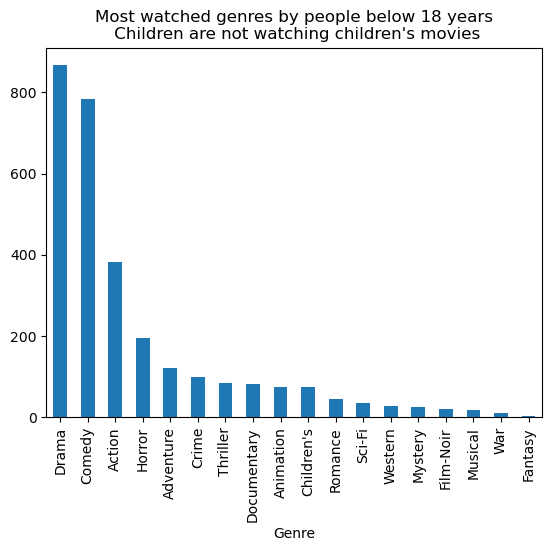

In [531]:
movies_youngsters['Genre'].value_counts().plot(kind='bar')
plt.title('Most watched genres by people below 18 years\n Children are not watching children\'s movies')
plt.show()

In [532]:
#From this we see that people below 18 years are also watching the same genres and movies that adults are watching-drama, comedy, etc.
#So my recommendation is to put a separate parental guidance or kids category in this-We see the children's category movies here are not being watched by children

In [533]:
data_ratings.dtypes

UserID       object
MovieID      object
Rating        int64
Timestamp    object
dtype: object

In [534]:
data_ratings['MovieID']=data_ratings['MovieID'].astype('int')

In [535]:
big_df_movies=new_df_movies.merge(data_ratings, left_on=new_df_movies.index, right_on='MovieID', how='inner')

In [536]:
#big_df_new=big_df.merge(big_df, on='UserID', how='right')

In [537]:
big_df_movies

,Movie ID,Genre,Release year,UserID,MovieID,Rating,Timestamp
0,Jumanji (1995),Adventure,1995,1,1,5,978824268
1,Jumanji (1995),Adventure,1995,6,1,4,978237008
2,Jumanji (1995),Adventure,1995,8,1,4,978233496
3,Jumanji (1995),Adventure,1995,9,1,5,978225952
4,Jumanji (1995),Adventure,1995,10,1,5,978226474
...,...,...,...,...,...,...,...
994342,From Dusk Till Dawn (1996),Comedy,1996,5812,3952,4,992072099
994343,From Dusk Till Dawn (1996),Comedy,1996,5831,3952,3,986223125
994344,From Dusk Till Dawn (1996),Comedy,1996,5837,3952,4,1011902656
994345,From Dusk Till Dawn (1996),Comedy,1996,5927,3952,1,979852537


In [538]:
big_df_users=data_users_copy.merge(data_ratings, on='UserID', how='left')

In [539]:
big_df=big_df_users.merge(new_df_movies, left_on='MovieID', right_on=new_df_movies.index, how='inner')

In [540]:
big_df.drop_duplicates(keep='first', inplace=True)

In [541]:
big_df

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Movie ID,Genre,Release year
0,1,1,Under 18,10,48067,1193,5,978300760,Wings of Desire (Der Himmel über Berlin) (1987),Comedy,1987
1,1,1,Under 18,10,48067,661,3,978302109,Bloodsport 2 (1995),Action,1995
2,1,1,Under 18,10,48067,914,3,978301968,All About Eve (1950),Drama,1950
3,1,1,Under 18,10,48067,3408,4,978300275,Empire Records (1995),Comedy,1995
4,1,1,Under 18,10,48067,2355,5,978824291,You've Got Mail (1998),Comedy,1998
...,...,...,...,...,...,...,...,...,...,...,...
994342,6040,0,25-34,6,11106,1091,1,956716541,Loser (1991),Comedy,1991
994343,6040,0,25-34,6,11106,1094,5,956704887,Bird of Prey (1996),Action,1996
994344,6040,0,25-34,6,11106,562,5,956704746,Naked in New York (1994),Comedy,1994
994345,6040,0,25-34,6,11106,1096,4,956715648,Palookaville (1996),Action,1996


In [542]:
big_df.drop(['MovieID', 'Timestamp'], axis=1, inplace=True)

In [543]:
data_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [544]:
new_uir=data_ratings.pivot(index='UserID',columns='MovieID', values='Rating').fillna(0)

In [545]:
new_uir

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [546]:
#Converting this into a csr matrix

In [547]:
from scipy.sparse import csr_matrix

In [548]:
csr_matrix=csr_matrix(new_uir)

In [549]:
new_uir.shape

(6040, 3706)

In [550]:
csr_matrix.data

array([5., 5., 5., ..., 4., 2., 1.])

In [551]:
csr_matrix.data.shape

(1000209,)

In [552]:
data_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455
...,...,...,...,...,...
6035,6036,1,25,15,32603
6036,6037,1,45,1,76006
6037,6038,1,56,1,14706
6038,6039,1,45,0,01060


In [553]:
dummies=pd.get_dummies(data_users[['Occupation','Zip-code']]).astype(int)

In [554]:
data_users=pd.concat([data_users.drop(['Occupation','Zip-code'], axis=1), dummies], axis=1)

In [555]:
data_users

,UserID,Gender,Age,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,...,Zip-code_99353,Zip-code_99504,Zip-code_99508,Zip-code_99516,Zip-code_99701,Zip-code_99703,Zip-code_99709,Zip-code_99801,Zip-code_99826,Zip-code_99945
0,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,1,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6036,6037,1,45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,6038,1,56,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,6039,1,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [556]:
#data_users['Zip-code']=data_users['Zip-code'].apply(lambda x: x[:5])

In [557]:
data_users=data_users.set_index('UserID')

In [558]:
data_users.dtypes

Gender            int64
Age               int64
Occupation_0      int64
Occupation_1      int64
Occupation_10     int64
                  ...  
Zip-code_99703    int64
Zip-code_99709    int64
Zip-code_99801    int64
Zip-code_99826    int64
Zip-code_99945    int64
Length: 3462, dtype: object

In [559]:
#data_users_copy[['Occupation','Zip-code']]=data_users_copy[['Occupation','Zip-code']].astype('int')

In [560]:
#user_user_corr=data_users.T.corr() #This is user-user correlation

In [561]:
data_users

,Gender,Age,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,...,Zip-code_99353,Zip-code_99504,Zip-code_99508,Zip-code_99516,Zip-code_99701,Zip-code_99703,Zip-code_99709,Zip-code_99801,Zip-code_99826,Zip-code_99945
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,1,25,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6037,1,45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,56,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [562]:
test_user=data_users.loc['4']

In [563]:
test_user

Gender             0
Age               45
Occupation_0       0
Occupation_1       0
Occupation_10      0
                  ..
Zip-code_99703     0
Zip-code_99709     0
Zip-code_99801     0
Zip-code_99826     0
Zip-code_99945     0
Name: 4, Length: 3462, dtype: int64

In [564]:
data_users.corrwith(test_user, axis=1, method='pearson').sort_values(ascending=False)[1:11]

UserID
2361    0.999584
2315    0.999584
2791    0.999584
1080    0.999584
521     0.999584
3969    0.999584
2275    0.999584
3555    0.999584
5196    0.999584
5336    0.999584
dtype: float64

In [565]:
data_users.corrwith(test_user, axis=1, method='spearman').sort_values(ascending=False)[1:11]

UserID
1947    0.66657
915     0.66657
3932    0.66657
4435    0.66657
5797    0.66657
1797    0.66657
3939    0.66657
923     0.66657
1804    0.66657
4425    0.66657
dtype: float64

In [566]:
#So we see that user ID 2361 is very closely similar to user ID 4

In [567]:
data_users.loc['2361']

Gender             0
Age               56
Occupation_0       0
Occupation_1       0
Occupation_10      0
                  ..
Zip-code_99703     0
Zip-code_99709     0
Zip-code_99801     0
Zip-code_99826     0
Zip-code_99945     0
Name: 2361, Length: 3462, dtype: int64

In [568]:
data_users.loc['1947']

Gender             0
Age               25
Occupation_0       0
Occupation_1       0
Occupation_10      0
                  ..
Zip-code_99703     0
Zip-code_99709     0
Zip-code_99801     0
Zip-code_99826     0
Zip-code_99945     0
Name: 1947, Length: 3462, dtype: int64

In [569]:
#Since pearson correlation gives very close values for lots of users and is not reliable, I decided to try using cosine similarity

In [570]:
def calc_cosine(l1, l2):
    dot_pdct=np.dot(l1, l2)
    mag_l1=np.linalg.norm(l1)
    mag_l2=np.linalg.norm(l2)
    if mag_l1==0 or mag_l2==0:
        return 0
    else:
        return(dot_pdct/(mag_l1*mag_l2))

In [571]:
#Checking for the same ID with cosine similarity

In [572]:
data_users.corrwith(test_user, axis=1, method=calc_cosine).sort_values(ascending=False)[1:11]

UserID
124     0.999584
1080    0.999584
5719    0.999584
3708    0.999584
3754    0.999584
2361    0.999584
2410    0.999584
5196    0.999584
4163    0.999584
31      0.999584
dtype: float64

In [573]:
data_users.loc['124']

Gender             0
Age               56
Occupation_0       0
Occupation_1       0
Occupation_10      0
                  ..
Zip-code_99703     0
Zip-code_99709     0
Zip-code_99801     0
Zip-code_99826     0
Zip-code_99945     0
Name: 124, Length: 3462, dtype: int64

In [574]:
#From what we see, the neares neighbors based on cosine similarity have similarity values very similar to pearson correlation, and this is shown below as well.
#We see that the values for spearman correlation are way off in terms of genre

In [575]:
big_df[big_df['UserID']=='4'].sort_values(by='Rating', ascending=False)[:10] #This is the test id

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
231,4,0,45-49,7,02460,5,Where the Money Is (2000),Comedy,2000
240,4,0,45-49,7,02460,5,"Big Blue, The (Le Grand Bleu) (1988)",Adventure,1988
250,4,0,45-49,7,02460,5,Creepshow (1982),Horror,1982
249,4,0,45-49,7,02460,5,"Iron Giant, The (1999)",Animation,1999
248,4,0,45-49,7,02460,5,Psycho (1960),Horror,1960
246,4,0,45-49,7,02460,5,"Evening Star, The (1996)",Comedy,1996
241,4,0,45-49,7,02460,5,"Godfather: Part III, The (1990)",Action,1990
237,4,0,45-49,7,02460,5,Something Wicked This Way Comes (1983),Children's,1983
236,4,0,45-49,7,02460,5,Ladybird Ladybird (1994),Drama,1994
251,4,0,45-49,7,02460,5,M (1931),Crime,1931


In [576]:
big_df[big_df['UserID']=='2361'].sort_values(by='Rating', ascending=False)[:10] #this is the closest id wih Pearson correlation

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
394957,2361,0,56+,7,49423,5,Universal Soldier: The Return (1999),Action,1999
394951,2361,0,56+,7,49423,5,My Science Project (1985),Adventure,1985
394959,2361,0,56+,7,49423,5,Iron Eagle (1986),Action,1986
394945,2361,0,56+,7,49423,5,"Portrait of a Lady, The (1996)",Drama,1996
394939,2361,0,56+,7,49423,5,"Amityville Horror, The (1979)",Horror,1979
394926,2361,0,56+,7,49423,5,Adventures in Babysitting (1987),Adventure,1987
394944,2361,0,56+,7,49423,5,We're No Angels (1989),Drama,1989
394961,2361,0,56+,7,49423,5,I Love Trouble (1994),Action,1994
394954,2361,0,56+,7,49423,5,"Color of Paradise, The (Rang-e Khoda) (1999)",Drama,1999
394929,2361,0,56+,7,49423,5,Vampires (1998),Horror,1998


In [577]:
big_df[big_df['UserID']=='1947'].sort_values(by='Rating', ascending=False)[:10] #this is with spearman correlation

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
327496,1947,0,25-34,7,94041,5,Back to the Future (1985),Comedy,1985
327621,1947,0,25-34,7,94041,5,Annie Hall (1977),Comedy,1977
327615,1947,0,25-34,7,94041,5,Psycho (1960),Horror,1960
327610,1947,0,25-34,7,94041,5,Out of the Past (1947),Film-Noir,1947
327607,1947,0,25-34,7,94041,5,North (1994),Comedy,1994
327538,1947,0,25-34,7,94041,5,Immortal Beloved (1994),Drama,1994
327604,1947,0,25-34,7,94041,5,Hatchet For the Honeymoon (Rosso Segno Della F...,Horror,1969
327602,1947,0,25-34,7,94041,5,Othello (1995),Drama,1995
327543,1947,0,25-34,7,94041,5,Ladybird Ladybird (1994),Drama,1994
327596,1947,0,25-34,7,94041,5,Bambi (1942),Animation,1942


In [578]:
big_df[big_df['UserID']=='124'].sort_values(by='Rating', ascending=False)[:10] #This is with cosine similarity

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
15788,124,0,56+,7,91356,5,"Princess Bride, The (1987)",Action,1987
15798,124,0,56+,7,91356,5,"Green Mile, The (1999)",Drama,1999
15803,124,0,56+,7,91356,5,Carrington (1995),Drama,1995
15800,124,0,56+,7,91356,5,"Dorado, El (1967)",Western,1967
15799,124,0,56+,7,91356,5,"Big Bang Theory, The (1994)",Crime,1994
15790,124,0,56+,7,91356,5,It's My Party (1995),Drama,1995
15791,124,0,56+,7,91356,5,Young Guns II (1990),Action,1990
15793,124,0,56+,7,91356,4,Fletch (1985),Comedy,1985
15794,124,0,56+,7,91356,4,"Talented Mr. Ripley, The (1999)",Drama,1999
15809,124,0,56+,7,91356,4,Stalker (1979),Mystery,1979


In [579]:
from sklearn.neighbors import NearestNeighbors

In [580]:
nn=NearestNeighbors(n_neighbors=5).fit(data_users)

In [581]:
dist, index=nn.kneighbors(data_users)

In [582]:
dist[3][1:5]

array([1.41421356, 1.41421356, 1.41421356, 1.41421356])

In [583]:
index[3][1:5] #This is using Euclidean distance

array([2205, 2765, 2684,  944])

In [584]:
big_df[big_df['UserID']=='2206'].sort_values(by='Rating', ascending=False)[:10] #We see this is showing mostly comedy films since user 4 is having comedy as the first choice he has watched

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
375458,2206,0,45-49,7,11201,5,Groundhog Day (1993),Comedy,1993
375331,2206,0,45-49,7,11201,5,My Son the Fanatic (1998),Comedy,1998
375336,2206,0,45-49,7,11201,5,Senseless (1998),Comedy,1998
375428,2206,0,45-49,7,11201,5,Carrington (1995),Drama,1995
375427,2206,0,45-49,7,11201,5,I Love Trouble (1994),Action,1994
375341,2206,0,45-49,7,11201,5,Little Shop of Horrors (1986),Comedy,1986
375342,2206,0,45-49,7,11201,5,Little Odessa (1994),Drama,1994
375423,2206,0,45-49,7,11201,5,"Dog of Flanders, A (1999)",Drama,1999
375415,2206,0,45-49,7,11201,5,Strawberry and Chocolate (Fresa y chocolate) (...,Drama,1993
375414,2206,0,45-49,7,11201,5,Buddy Boy (1999),Drama,1999


In [585]:
new_nn=NearestNeighbors(n_neighbors=5, metric=calc_cosine).fit(data_users)

In [586]:
#new_nn.kneighbors(data_users) #This takes a lot of time since it calculates pair wise similarity and the number of dimensions and users are high

In [587]:
#Doing item based similarity

In [588]:
new_df_movies

,Movie ID,Genre,Release year
0,Toy Story (1995),Animation,1995
1,Jumanji (1995),Adventure,1995
2,Grumpier Old Men (1995),Comedy,1995
3,Waiting to Exhale (1995),Comedy,1995
4,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
16776,Diva (1981),Thriller,1981
17058,Hercules (1997),Musical,1997
17543,Lady and the Tramp (1955),Romance,1955
17544,"Little Mermaid, The (1989)",Romance,1989


In [589]:
test_movie_id='Diva (1981)'

In [590]:
new_df_movies[new_df_movies['Movie ID']==test_movie_id]

,Movie ID,Genre,Release year
1244,Diva (1981),Action,1981
5127,Diva (1981),Drama,1981
9010,Diva (1981),Mystery,1981
12893,Diva (1981),Romance,1981
16776,Diva (1981),Thriller,1981


In [591]:
dummies_genre=pd.get_dummies(new_df_movies['Genre']).astype(int)

In [592]:
movies_copy=pd.concat([new_df_movies.drop('Genre', axis=1), dummies_genre], axis=1).set_index('Movie ID')

In [593]:
movies_copy

,Release year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jumanji (1995),1995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diva (1981),1981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Hercules (1997),1997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Lady and the Tramp (1955),1955,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [594]:
movies_copy.corrwith(movies_copy.iloc[2], axis=1).sort_values(ascending=False).index[1:6]

Index(['Rent-a-Kid (1995)',
       'Incredibly True Adventure of Two Girls in Love, The (1995)',
       'Kicking and Screaming (1995)', 'Denise Calls Up (1995)',
       'Theodore Rex (1995)'],
      dtype='object', name='Movie ID')

In [595]:
movies_copy.corrwith(movies_copy.iloc[2], axis=1,method=calc_cosine).sort_values(ascending=False).index[1:6]

Index(['French Twist (Gazon maudit) (1995)', 'Stuart Saves His Family (1995)',
       'Doom Generation, The (1995)',
       'Day of the Beast, The (El Día de la bestia) (1995)',
       'Close Shave, A (1995)'],
      dtype='object', name='Movie ID')

In [596]:
new_df_movies[new_df_movies['Movie ID']=='Grumpier Old Men (1995)'] #test item

,Movie ID,Genre,Release year
2,Grumpier Old Men (1995),Comedy,1995
3885,Grumpier Old Men (1995),Romance,1995


In [597]:
new_df_movies[new_df_movies['Movie ID']=='Rent-a-Kid (1995)'] #with pearson correlation, here we see that it is not picking up the romance movies

,Movie ID,Genre,Release year
307,Rent-a-Kid (1995),Comedy,1995


In [598]:
new_df_movies[new_df_movies['Movie ID']=='Incredibly True Adventure of Two Girls in Love, The (1995)'] #This is also comedy, again Pearson correlation does not pick all the genres 

,Movie ID,Genre,Release year
2977,Incredibly True Adventure of Two Girls in Love...,Comedy,1995


In [599]:
new_df_movies[new_df_movies['Movie ID']=='French Twist (Gazon maudit) (1995)'] #with cosine similarity

,Movie ID,Genre,Release year
67,French Twist (Gazon maudit) (1995),Comedy,1995
3950,French Twist (Gazon maudit) (1995),Romance,1995


In [600]:
#with sklearn
item_item_sk=NearestNeighbors(n_neighbors=5, metric=calc_cosine).fit(movies_copy)

In [601]:
#dist, indx=item_item_sk.kneighbors(movies_copy) #this takes a very long time and hangs

In [602]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [603]:
data_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [604]:
from surprise import SVD, SVDpp

In [605]:
from surprise.model_selection import cross_validate

In [606]:
from surprise import Dataset, Reader

In [607]:
from surprise.model_selection import train_test_split

In [608]:
from surprise import accuracy

In [609]:
reader=Reader(rating_scale=(1,5))

In [610]:
data_uir=Dataset.load_from_df(data_ratings[['UserID','MovieID','Rating']], reader=reader)

In [611]:
data_uir

In [612]:
cross_validate(SVD(),data_uir,measures=['RMSE'], cv=3)

{'test_rmse': array([0.88583767, 0.88583847, 0.88477543]),
 'fit_time': (8.22065782546997, 8.182288885116577, 19.765274047851562),
 'test_time': (4.53595232963562, 3.5904839038848877, 3.841012954711914)}

In [613]:
algo=SVD(n_factors=10, random_state=10)
trainset, testset=train_test_split(data_uir,test_size=0.2, random_state=10)

In [614]:
algo.fit(trainset)

In [615]:
predictions=algo.test(testset)

In [616]:
predictions

[Prediction(uid='3824', iid=3395, r_ui=3.0, est=2.6297191210378403, details={'was_impossible': False}),
 Prediction(uid='4541', iid=2335, r_ui=4.0, est=3.724627855001481, details={'was_impossible': False}),
 Prediction(uid='3691', iid=3452, r_ui=3.0, est=3.220341429771391, details={'was_impossible': False}),
 Prediction(uid='5220', iid=527, r_ui=5.0, est=4.389369040824064, details={'was_impossible': False}),
 Prediction(uid='121', iid=2327, r_ui=4.0, est=3.927285184959526, details={'was_impossible': False}),
 Prediction(uid='4425', iid=1584, r_ui=4.0, est=3.4928283639165594, details={'was_impossible': False}),
 Prediction(uid='4553', iid=3095, r_ui=3.0, est=3.2676034481912226, details={'was_impossible': False}),
 Prediction(uid='2929', iid=1288, r_ui=5.0, est=4.7951948795571875, details={'was_impossible': False}),
 Prediction(uid='1181', iid=1172, r_ui=3.0, est=3.5813801602699153, details={'was_impossible': False}),
 Prediction(uid='284', iid=3671, r_ui=5.0, est=4.036725510891891, deta

In [617]:
calc_mape=lambda act, pred: np.mean(abs((act-pred)/act)) 

In [618]:
accuracy.rmse(predictions)

RMSE: 0.8698


0.8698124805305145

In [619]:
pred_df=pd.DataFrame(predictions)

In [620]:
print(f"MAPE={calc_mape(pred_df['r_ui'], pred_df['est'])}") #This is 26.43%

MAPE=0.2643222633600215


In [954]:
algo_4=SVD(n_factors=4, random_state=10) 
algo_4.fit(trainset)

In [958]:
user_embeddings_4d=algo_4.pu
user_embeddings_4d

array([[-0.23282926,  0.05626143,  0.13587073, -0.04220571],
       [-0.09847236, -0.13413209, -0.05723574, -0.07472952],
       [-0.11387646,  0.04276934, -0.28955791, -0.11920399],
       ...,
       [ 0.05305511, -0.13017609, -0.13545317, -0.09359154],
       [ 0.04243814, -0.02133641, -0.12856135, -0.17085019],
       [-0.07627548, -0.13115112, -0.00822022, -0.07031431]])

In [960]:
user_embeddings_4d.shape

(6040, 4)

In [968]:
from sklearn.metrics.pairwise import cosine_similarity

In [976]:
cosine_similarity(user_embeddings_4d)

array([[ 1.        ,  0.20198674, -0.05760565, ..., -0.56588795,
        -0.34968322,  0.26222678],
       [ 0.20198674,  1.        ,  0.48204372, ...,  0.6519593 ,
         0.44918114,  0.96314408],
       [-0.05760565,  0.48204372,  1.        , ...,  0.53308174,
         0.70463884,  0.24605411],
       ...,
       [-0.56588795,  0.6519593 ,  0.53308174, ...,  1.        ,
         0.81052668,  0.57166882],
       [-0.34968322,  0.44918114,  0.70463884, ...,  0.81052668,
         1.        ,  0.34445472],
       [ 0.26222678,  0.96314408,  0.24605411, ...,  0.57166882,
         0.34445472,  1.        ]])

In [984]:
cosine_4d_df_uu=pd.DataFrame(cosine_similarity(user_embeddings_4d), index=data_users.index, columns=data_users.index)

In [992]:
cosine_4d_df_uu

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.201987,-0.057606,0.713259,0.431924,-0.259322,-0.491653,0.493486,-0.203415,0.012742,...,0.211211,0.588788,0.376787,0.012078,0.460171,-0.183393,-0.916394,-0.565888,-0.349683,0.262227
2,0.201987,1.000000,0.482044,-0.447528,-0.235665,-0.122985,-0.826596,-0.246519,-0.353528,0.684067,...,0.187525,-0.653558,-0.527996,0.326275,0.281599,0.664158,0.199771,0.651959,0.449181,0.963144
3,-0.057606,0.482044,1.000000,-0.617945,-0.812628,-0.516870,-0.737904,-0.723358,-0.912919,0.911708,...,0.449902,-0.478637,-0.814913,-0.571506,0.350093,0.942832,0.188964,0.533082,0.704639,0.246054
4,0.713259,-0.447528,-0.617945,1.000000,0.805110,0.166052,0.241724,0.670180,0.284360,-0.666287,...,0.058333,0.886349,0.752260,0.014674,0.240140,-0.753504,-0.872392,-0.952423,-0.820851,-0.314335
5,0.431924,-0.235665,-0.812628,0.805110,1.000000,0.658342,0.360743,0.538227,0.542052,-0.823478,...,0.085429,0.481661,0.595661,0.342671,0.246517,-0.742435,-0.484381,-0.689586,-0.933422,-0.061979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.183393,0.664158,0.942832,-0.753504,-0.742435,-0.293416,-0.742980,-0.803188,-0.810534,0.892208,...,0.467008,-0.728930,-0.930005,-0.380204,0.364140,1.000000,0.398780,0.718339,0.693416,0.446059
6037,-0.916394,0.199771,0.188964,-0.872392,-0.484381,0.231150,0.191389,-0.534916,0.131446,0.222530,...,-0.189281,-0.841352,-0.537254,0.190370,-0.389556,0.398780,1.000000,0.822958,0.509414,0.144662
6038,-0.565888,0.651959,0.533082,-0.952423,-0.689586,-0.157451,-0.358901,-0.510193,-0.182506,0.686487,...,-0.144331,-0.918542,-0.671853,0.237582,-0.253879,0.718339,0.822958,1.000000,0.810527,0.571669


In [1000]:
test_user_id='4'
cosine_4d_df_uu.loc[test_user_id].sort_values(ascending=False)[1:6].index #These are the similar users to the test user '4'

Index(['6018', '3644', '4577', '1967', '5517'], dtype='object', name='UserID')

In [1002]:
item_embeddings_4d=algo_4.qi
item_embeddings_4d

array([[-0.23267318, -0.03037235,  0.01414002,  0.06847499],
       [ 0.57751952, -0.06612899,  0.40201703,  0.45844334],
       [ 0.03318621, -0.12663636, -0.4926213 , -0.07916789],
       ...,
       [ 0.21331371,  0.12964365, -0.06056229,  0.09629305],
       [-0.13140219, -0.0747873 , -0.08020136, -0.0609257 ],
       [-0.07281764, -0.08132279,  0.06267564, -0.0186426 ]])

In [964]:
item_embeddings_4d.shape

(3677, 4)

In [ ]:
#Doint it with 2 d and plotting


In [1043]:
algo_2d=SVD(n_factors=2, random_state=10)
algo_2d.fit(trainset)

In [1082]:
d1=algo_2d.pu

In [1086]:
d1.shape

(6040, 2)

In [1094]:
d1[:,0]

array([ 0.19455285, -0.3120365 , -0.2533519 , ..., -0.08312101,
        0.05982404,  0.01913027])

In [1096]:
d1[:,1]

array([ 0.29215045,  0.08333962, -0.03630493, ..., -0.16384506,
       -0.14855158,  0.08400652])

Text(0.5, 1.0, 'User-user plot for 2d')

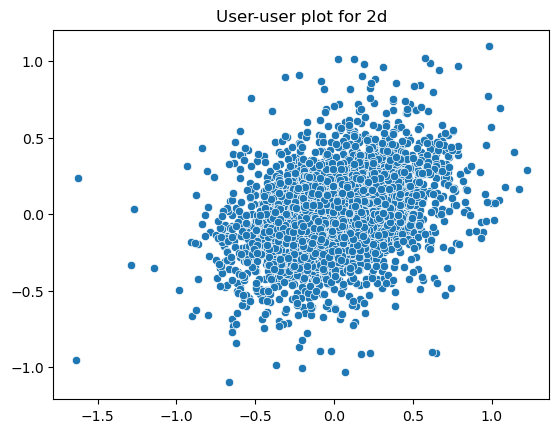

In [1104]:
sns.scatterplot(x=d1[:,0], y=d1[:,1])
plt.title('User-user plot for 2d') #Here we already see some outliers based on 2d

Text(0.5, 1.0, 'Item item plot on 2d')

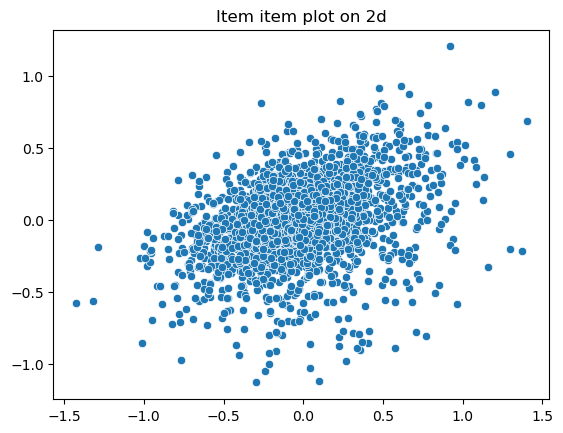

In [1108]:
sns.scatterplot(x=algo_2d.qi[:,0],y=algo_2d.qi[:,1])
plt.title('Item item plot on 2d')

In [625]:
#data_uir.build_full_trainset()

In [626]:
#algo.fit(trainset)

In [627]:
user_embeddings.shape

(6040, 10)

In [628]:
testset

[('3824', 3395, 3.0),
 ('4541', 2335, 4.0),
 ('3691', 3452, 3.0),
 ('5220', 527, 5.0),
 ('121', 2327, 4.0),
 ('4425', 1584, 4.0),
 ('4553', 3095, 3.0),
 ('2929', 1288, 5.0),
 ('1181', 1172, 3.0),
 ('284', 3671, 5.0),
 ('5880', 919, 3.0),
 ('1770', 1288, 3.0),
 ('3272', 2581, 4.0),
 ('5754', 2607, 4.0),
 ('188', 3384, 5.0),
 ('6021', 1, 3.0),
 ('4007', 2476, 3.0),
 ('1861', 1641, 4.0),
 ('6035', 1614, 4.0),
 ('6030', 1372, 4.0),
 ('4670', 900, 4.0),
 ('1922', 3107, 4.0),
 ('1119', 367, 4.0),
 ('3823', 3307, 3.0),
 ('2784', 1183, 2.0),
 ('4054', 3404, 3.0),
 ('5594', 1206, 5.0),
 ('3961', 2716, 3.0),
 ('3118', 1960, 4.0),
 ('3518', 412, 4.0),
 ('1202', 1247, 5.0),
 ('2592', 1333, 4.0),
 ('2334', 1960, 4.0),
 ('2756', 2762, 4.0),
 ('5113', 3259, 1.0),
 ('720', 2712, 2.0),
 ('4496', 1200, 4.0),
 ('3393', 590, 3.0),
 ('5013', 8, 2.0),
 ('2393', 2532, 4.0),
 ('917', 110, 5.0),
 ('3844', 1980, 5.0),
 ('1988', 2369, 3.0),
 ('5872', 733, 3.0),
 ('3778', 3016, 2.0),
 ('5686', 2390, 3.0),
 ('2407

In [629]:
algo.predict('5220','527','5')

Prediction(uid='5220', iid='527', r_ui='5', est=3.2828334550749383, details={'was_impossible': False})

In [630]:
pd.DataFrame(algo.test(testset))

,uid,iid,r_ui,est,details
0,3824,3395,3.0,2.629719,{'was_impossible': False}
1,4541,2335,4.0,3.724628,{'was_impossible': False}
2,3691,3452,3.0,3.220341,{'was_impossible': False}
3,5220,527,5.0,4.389369,{'was_impossible': False}
4,121,2327,4.0,3.927285,{'was_impossible': False}
...,...,...,...,...,...
200037,3742,50,5.0,4.775324,{'was_impossible': False}
200038,2737,1633,4.0,3.834989,{'was_impossible': False}
200039,5323,3004,1.0,1.295343,{'was_impossible': False}
200040,4521,1580,2.0,3.842577,{'was_impossible': False}


In [631]:
new_algo=SVD(n_factors=1000, random_state=10)

In [632]:
new_algo.fit(trainset)

In [633]:
predictions_new=new_algo.test(testset)

In [634]:
predictions_new

[Prediction(uid='3824', iid=3395, r_ui=3.0, est=2.8818824353121095, details={'was_impossible': False}),
 Prediction(uid='4541', iid=2335, r_ui=4.0, est=3.3885392089319613, details={'was_impossible': False}),
 Prediction(uid='3691', iid=3452, r_ui=3.0, est=2.744928441450557, details={'was_impossible': False}),
 Prediction(uid='5220', iid=527, r_ui=5.0, est=3.76638584327479, details={'was_impossible': False}),
 Prediction(uid='121', iid=2327, r_ui=4.0, est=4.172304501529528, details={'was_impossible': False}),
 Prediction(uid='4425', iid=1584, r_ui=4.0, est=3.605456300955411, details={'was_impossible': False}),
 Prediction(uid='4553', iid=3095, r_ui=3.0, est=3.4119985095574386, details={'was_impossible': False}),
 Prediction(uid='2929', iid=1288, r_ui=5.0, est=4.488084113697809, details={'was_impossible': False}),
 Prediction(uid='1181', iid=1172, r_ui=3.0, est=3.3202591503891448, details={'was_impossible': False}),
 Prediction(uid='284', iid=3671, r_ui=5.0, est=3.7329290288812675, detai

In [635]:
pred_1000=pd.DataFrame(predictions_new)

In [636]:
new_algo_500=SVD(n_factors=500, random_state=10)
new_algo_500.fit(trainset)

In [637]:
pred_500=new_algo.test(testset)

In [638]:
accuracy.rmse(predictions_new) #by increasing the number of factors, we see a clear increase in the RMSE value
#This is for 1000 factors

RMSE: 0.8889


0.8888565523166096

In [639]:
print(f"MAPE={calc_mape(pred_1000['r_ui'], pred_1000['est'])}") #This is also 27.22%

MAPE=0.2722441764166128


In [640]:
pred500_df=pd.DataFrame(pred_500)
print(f"MAPE={calc_mape(pred500_df['r_ui'],pred500_df['est'])}") #This mape is 27.2%

MAPE=0.2722441764166128


In [641]:
accuracy.rmse(pred_500) #This is for 500 factors

RMSE: 0.8889


0.8888565523166096

In [642]:
accuracy.rmse(predictions) #This is the earlier prediction with 10 factors

RMSE: 0.8698


0.8698124805305145

In [643]:
print(f"MAPE={calc_mape(pred_df['r_ui'], pred_df['est'])}") #This is 26.43% for the matrices with just 10 factors

MAPE=0.2643222633600215


In [644]:
data_users

,Gender,Age,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,...,Zip-code_99353,Zip-code_99504,Zip-code_99508,Zip-code_99516,Zip-code_99701,Zip-code_99703,Zip-code_99709,Zip-code_99801,Zip-code_99826,Zip-code_99945
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,1,25,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6037,1,45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,56,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [645]:
big_df

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
0,1,1,Under 18,10,48067,5,Wings of Desire (Der Himmel über Berlin) (1987),Comedy,1987
1,1,1,Under 18,10,48067,3,Bloodsport 2 (1995),Action,1995
2,1,1,Under 18,10,48067,3,All About Eve (1950),Drama,1950
3,1,1,Under 18,10,48067,4,Empire Records (1995),Comedy,1995
4,1,1,Under 18,10,48067,5,You've Got Mail (1998),Comedy,1998
...,...,...,...,...,...,...,...,...,...
994342,6040,0,25-34,6,11106,1,Loser (1991),Comedy,1991
994343,6040,0,25-34,6,11106,5,Bird of Prey (1996),Action,1996
994344,6040,0,25-34,6,11106,5,Naked in New York (1994),Comedy,1994
994345,6040,0,25-34,6,11106,4,Palookaville (1996),Action,1996


In [646]:
#Answers to questions asked in the case at the end

Text(0.5, 1.0, 'People in the 25-35 age group watch and rate maximum movies')

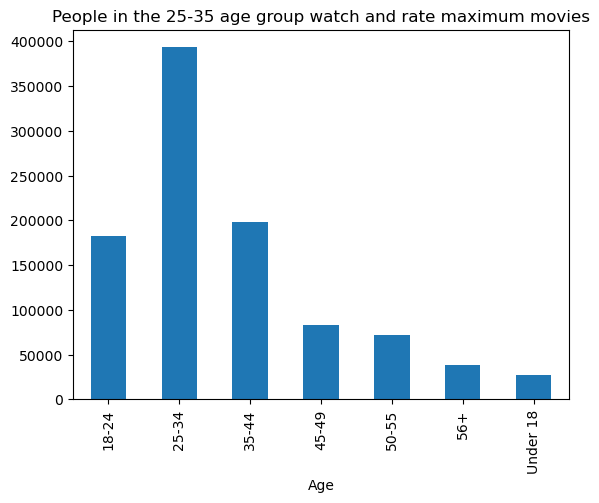

In [647]:
big_df.groupby('Age')['Movie ID'].count().plot(kind='bar')
plt.title('People in the 25-35 age group watch and rate maximum movies')

In [648]:
big_df['Occupation'].replace(list(map(str,range(21))),['Other','Academic/Educator','Artist','Clerical/admin','College student','customer service','doctor/healthcare','executive/managerial','farmer','homemaker','K-12 student','lawyer','programmer','retired','sales/marketing','scientist','self-employed','technician/engineer','trandesman/craftsman','unemployed','writer'], inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/841533761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_df['Occupation'].replace(list(map(str,range(21))),['Other','Academic/Educator','Artist','Clerical/admin','College student','customer service','doctor/healthcare','executive/managerial','farmer','homemaker','K-12 student','lawyer','programmer','retired','sales/marketing','scientist','self-employed','technician/engineer','trandesman/craftsman','unemployed','writer'], inplace=True)


In [649]:
big_df['Occupation'].unique()

array(['K-12 student', 'self-employed', 'scientist',
       'executive/managerial', 'writer', 'homemaker', 'Academic/Educator',
       'programmer', 'technician/engineer', 'Other', 'Clerical/admin',
       'sales/marketing', 'College student', 'lawyer', 'farmer',
       'unemployed', 'Artist', 'trandesman/craftsman', 'customer service',
       'retired', 'doctor/healthcare'], dtype=object)

Text(0.5, 1.0, 'The students are the people who watch and rate maximum movies')

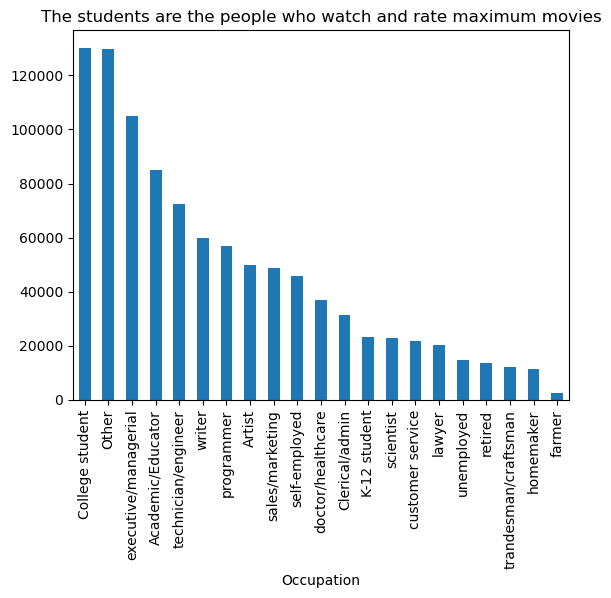

In [650]:
big_df.groupby('Occupation')['Movie ID'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('The students are the people who watch and rate maximum movies')

In [651]:
big_df['Gender'].replace({0:'M',1:'F'}, inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/1953657662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_df['Gender'].replace({0:'M',1:'F'}, inplace=True)


In [652]:
big_df

,UserID,Gender,Age,Occupation,Zip-code,Rating,Movie ID,Genre,Release year
0,1,F,Under 18,K-12 student,48067,5,Wings of Desire (Der Himmel über Berlin) (1987),Comedy,1987
1,1,F,Under 18,K-12 student,48067,3,Bloodsport 2 (1995),Action,1995
2,1,F,Under 18,K-12 student,48067,3,All About Eve (1950),Drama,1950
3,1,F,Under 18,K-12 student,48067,4,Empire Records (1995),Comedy,1995
4,1,F,Under 18,K-12 student,48067,5,You've Got Mail (1998),Comedy,1998
...,...,...,...,...,...,...,...,...,...
994342,6040,M,25-34,doctor/healthcare,11106,1,Loser (1991),Comedy,1991
994343,6040,M,25-34,doctor/healthcare,11106,5,Bird of Prey (1996),Action,1996
994344,6040,M,25-34,doctor/healthcare,11106,5,Naked in New York (1994),Comedy,1994
994345,6040,M,25-34,doctor/healthcare,11106,4,Palookaville (1996),Action,1996


In [653]:
big_df.groupby('Gender')['Gender'].count() #Therefore most users who rated movies are male

Gender
F    244928
M    749419
Name: Gender, dtype: int64

In [654]:
big_df['Decade']=decade=pd.cut(big_df['Release year'], bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000])

In [655]:
big_df.groupby('Decade')['Decade'].count()
#We have 80053 movies in the 1970s, 187924 movies in the 1980s, 42816 movies in the 1950s,and 564171 movies in the 1990s

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/2957018936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  big_df.groupby('Decade')['Decade'].count()


Decade
(1920, 1930]      8075
(1930, 1940]     25267
(1940, 1950]     31415
(1950, 1960]     42816
(1960, 1970]     54236
(1970, 1980]     80053
(1980, 1990]    187924
(1990, 2000]    564171
Name: Decade, dtype: int64

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_744/1675166310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  big_df.groupby('Decade')['Decade'].count().plot(kind='bar')


<Axes: xlabel='Decade'>

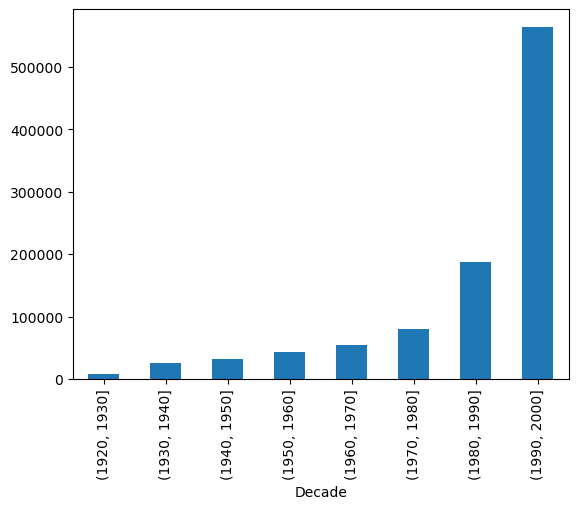

In [656]:
big_df.groupby('Decade')['Decade'].count().plot(kind='bar')

In [657]:
big_df.groupby('Movie ID')['Rating'].count().sort_values(ascending=False) #The movie with the highest count of ratings is "Brief Encounter"

Movie ID
Brief Encounter (1946)      3428
Ladybird Ladybird (1994)    2991
Alien (1979)                2990
Raging Bull (1980)          2883
Lassie (1994)               2672
                            ... 
Predator (1987)                1
Johnny 100 Pesos (1993)        1
Little City (1998)             1
Matilda (1996)                 1
Relic, The (1997)              1
Name: Rating, Length: 3610, dtype: int64

In [658]:
#The collaborative filtering is split into metric based(user based and item based collaborative filtering) 
#and model based (based on models such as KNN with means, matrix factorization, SVD, etc)

In [659]:
#Conclusions
#1. The most watched genres are comedy and drama
#2. Post 1990s, there has been a shift from more horror movies towards action and thriller movies
#3. Using pearson correlation for item item collaboration does not capture the all the genres in the movie, 
# Using cosine similarity works better and captures all the genres in a movie so it can recommend multiple movies more effectively
#4. Using SVD with more factors does increase the RMSE value
# however we need to increase the number of factors from 10 to 1000 to notice the difference.
#This means that having fewer dimensions will not generally affect the error by much.
#5. We see that all user groups prefer the same genre, so there is an opportunity to align content by age group-say for elderly people, children, teenagers, etc.